In [91]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.model_selection import KFold,cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [93]:
train_df = pd.read_csv('train.csv')

In [94]:
train_df.shape

(50999, 34)

In [95]:
train_df.head(2)

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,...,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,...,2,22,1,18,5,Y,Y,E,2,1


In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      50999 non-null  int64 
 1   Hazard  50999 non-null  int64 
 2   T1_V1   50999 non-null  int64 
 3   T1_V2   50999 non-null  int64 
 4   T1_V3   50999 non-null  int64 
 5   T1_V4   50999 non-null  object
 6   T1_V5   50999 non-null  object
 7   T1_V6   50999 non-null  object
 8   T1_V7   50999 non-null  object
 9   T1_V8   50999 non-null  object
 10  T1_V9   50999 non-null  object
 11  T1_V10  50999 non-null  int64 
 12  T1_V11  50999 non-null  object
 13  T1_V12  50999 non-null  object
 14  T1_V13  50999 non-null  int64 
 15  T1_V14  50999 non-null  int64 
 16  T1_V15  50999 non-null  object
 17  T1_V16  50999 non-null  object
 18  T1_V17  50999 non-null  object
 19  T2_V1   50999 non-null  int64 
 20  T2_V2   50999 non-null  int64 
 21  T2_V3   50999 non-null  object
 22  T2_V4   50999 non-null

In [97]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,50999.0,50929.727897,29314.685894,1.0,25660.5,50977.0,76268.5,101999.0
Hazard,50999.0,4.022785,4.021194,1.0,1.0,3.0,5.0,69.0
T1_V1,50999.0,9.722093,5.167943,1.0,6.0,9.0,14.0,19.0
T1_V2,50999.0,12.847585,6.255743,1.0,7.0,14.0,18.0,24.0
T1_V3,50999.0,3.186004,1.739369,1.0,2.0,3.0,4.0,9.0
T1_V10,50999.0,7.020451,3.595279,2.0,3.0,8.0,8.0,12.0
T1_V13,50999.0,13.996255,4.647499,5.0,10.0,15.0,20.0,20.0
T1_V14,50999.0,1.578521,0.862882,0.0,1.0,1.0,2.0,4.0
T2_V1,50999.0,57.580051,23.499818,1.0,40.0,56.0,77.0,100.0
T2_V2,50999.0,12.419616,4.783411,1.0,9.0,11.0,15.0,39.0


In [98]:
categorical = []
numerical = []
for i in train_df.columns:
    if train_df[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)
        
print('Categorical Variables:\n',categorical)
print('\nNumerical Variables:\n',numerical)

Categorical Variables:
 ['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11', 'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11', 'T2_V12', 'T2_V13']

Numerical Variables:
 ['Id', 'Hazard', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V14', 'T2_V15']


<Figure size 1080x864 with 0 Axes>

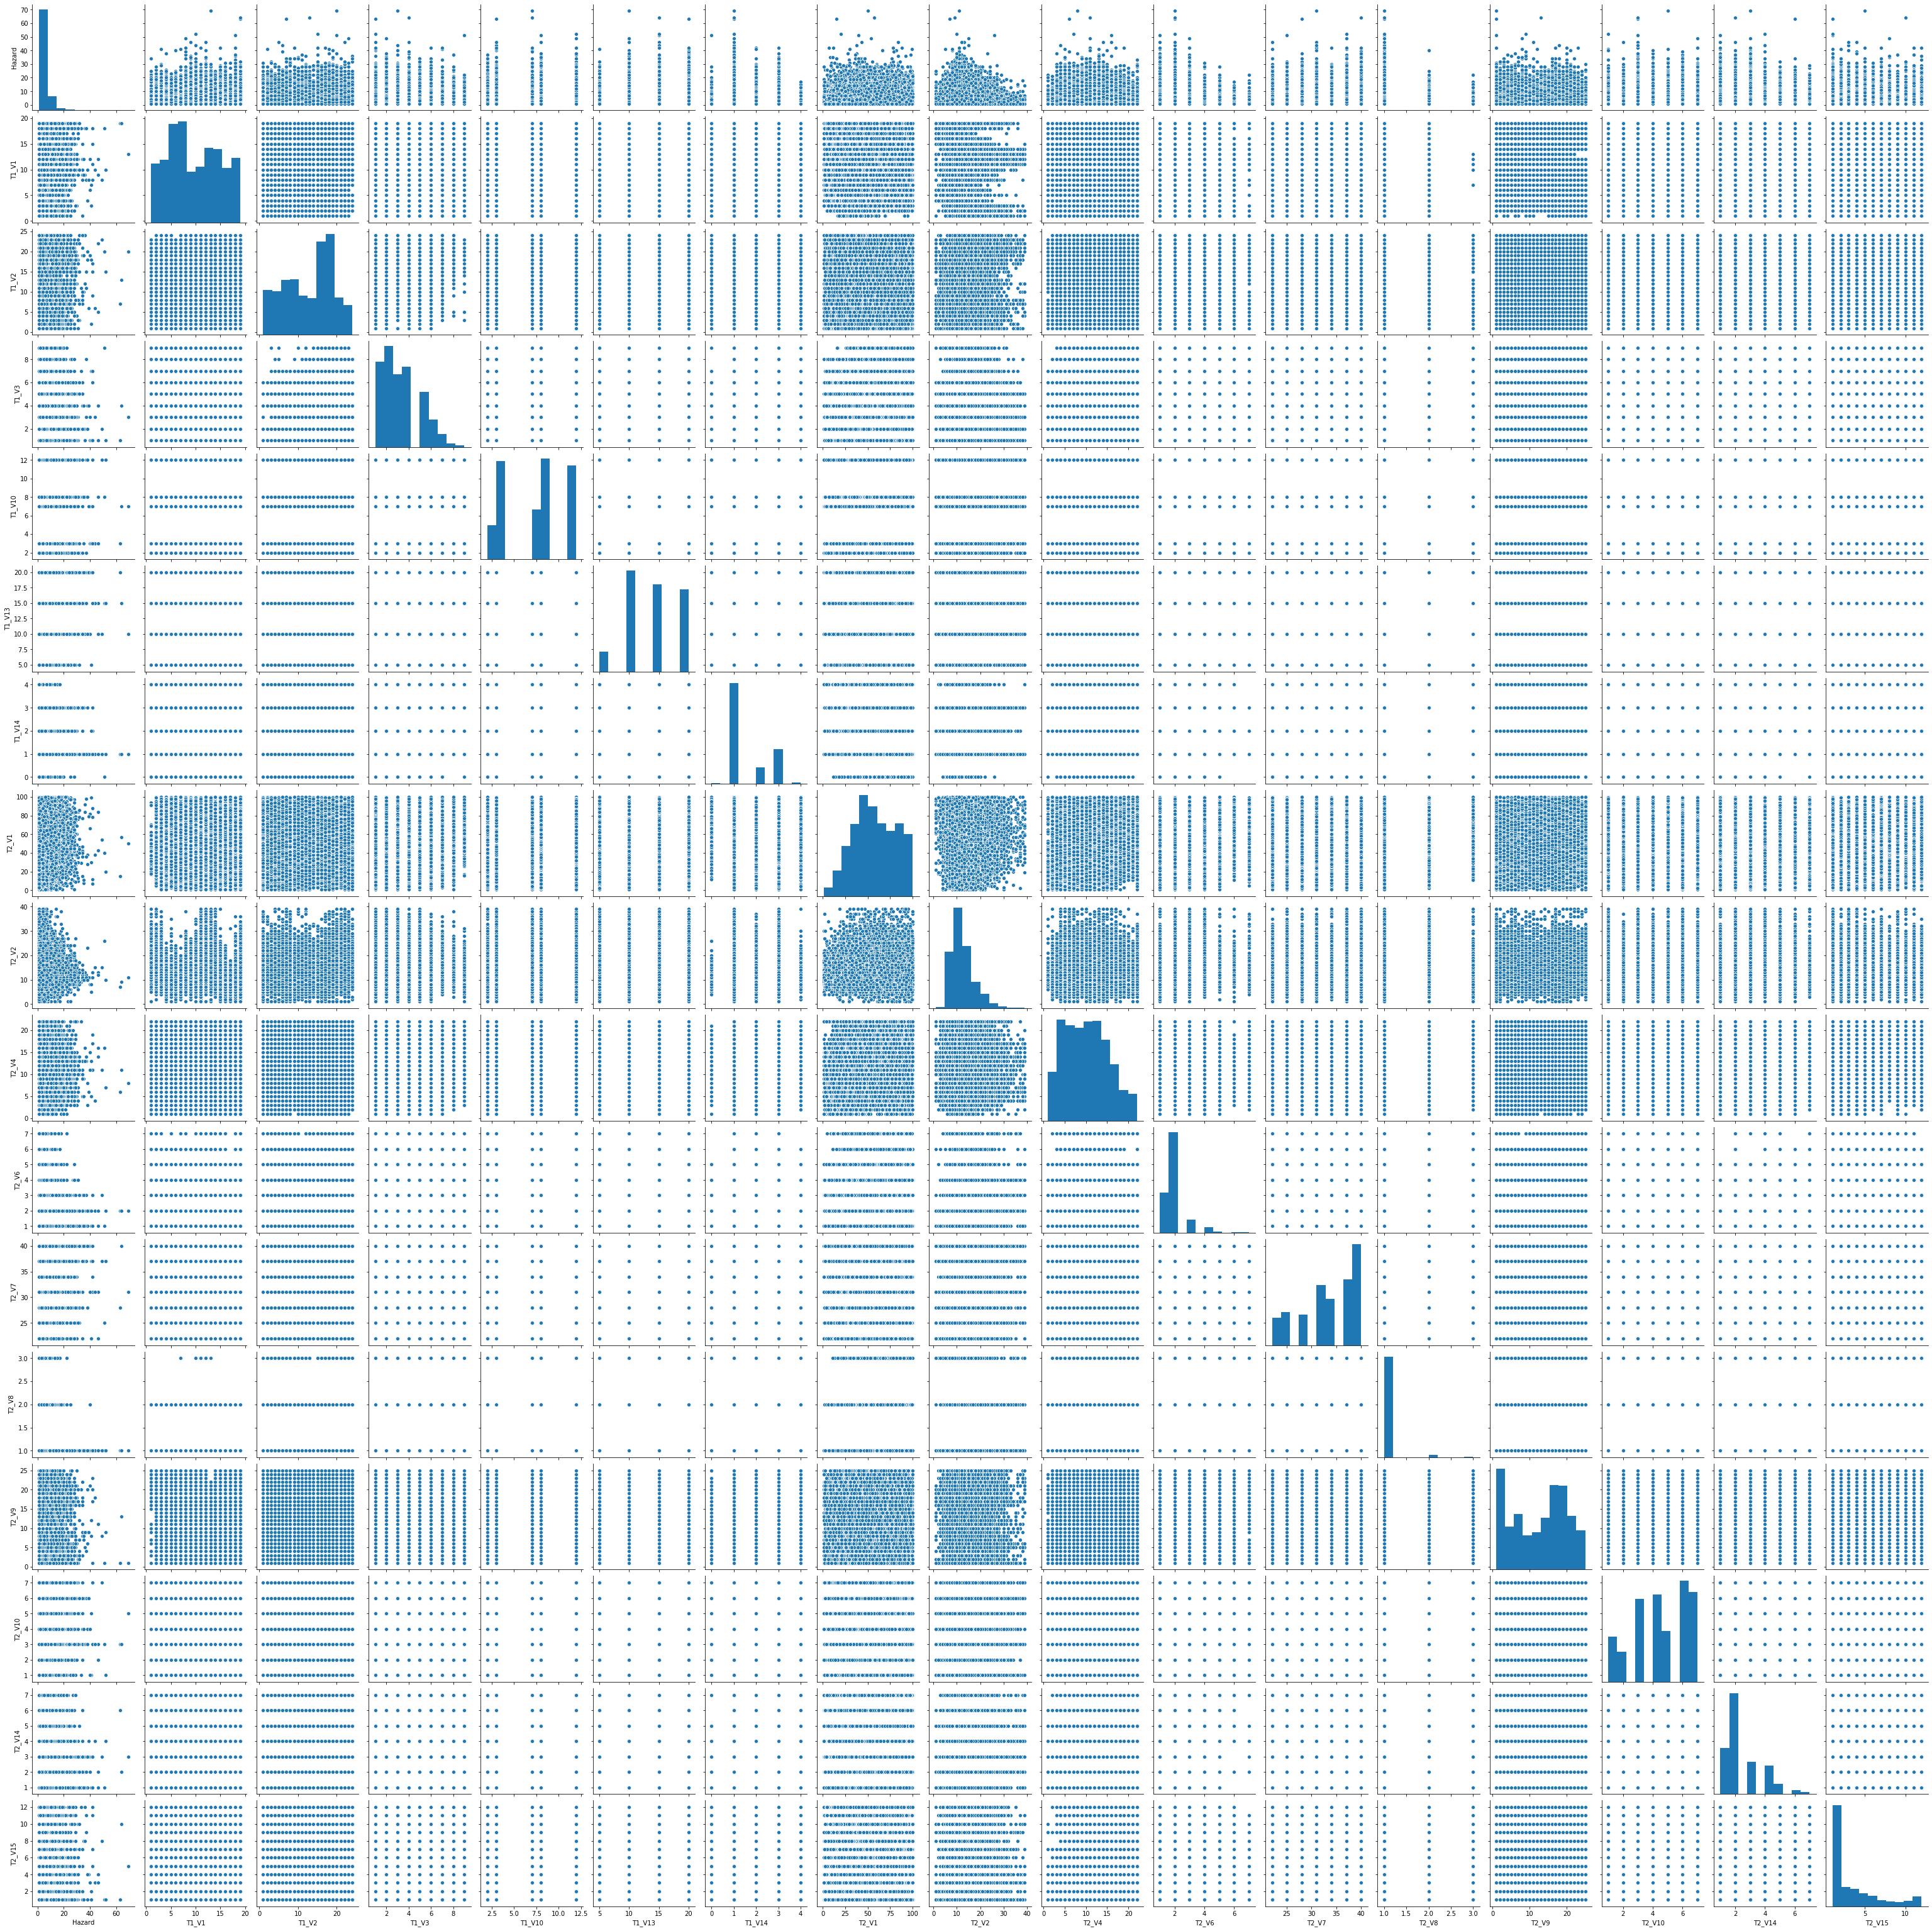

In [99]:
plt.figure(figsize=(15,12))
sns.pairplot(train_df[numerical[1:]],diag_kind='auto')
plt.show()

After observing the above graph we can say that some features are categorical in nature but they are encoded as numerical value. so we proceed further considering them as categorical.

In [100]:
numerical_features=['T2_V1','T2_V2','T2_V4','T2_V9','T2_V15','T1_V1','T1_V2']
categorical_features=['T2_V3','T2_V5','T2_V6','T2_V7','T2_V8','T2_V10','T2_V11','T2_V12','T2_V13','T2_V14','T1_V3',
                      'T1_V4','T1_V5','T1_V6','T1_V7','T1_V8','T1_V9','T1_V10','T1_V11','T1_V12','T1_V13','T1_V14',
                      'T1_V15','T1_V16','T1_V17']

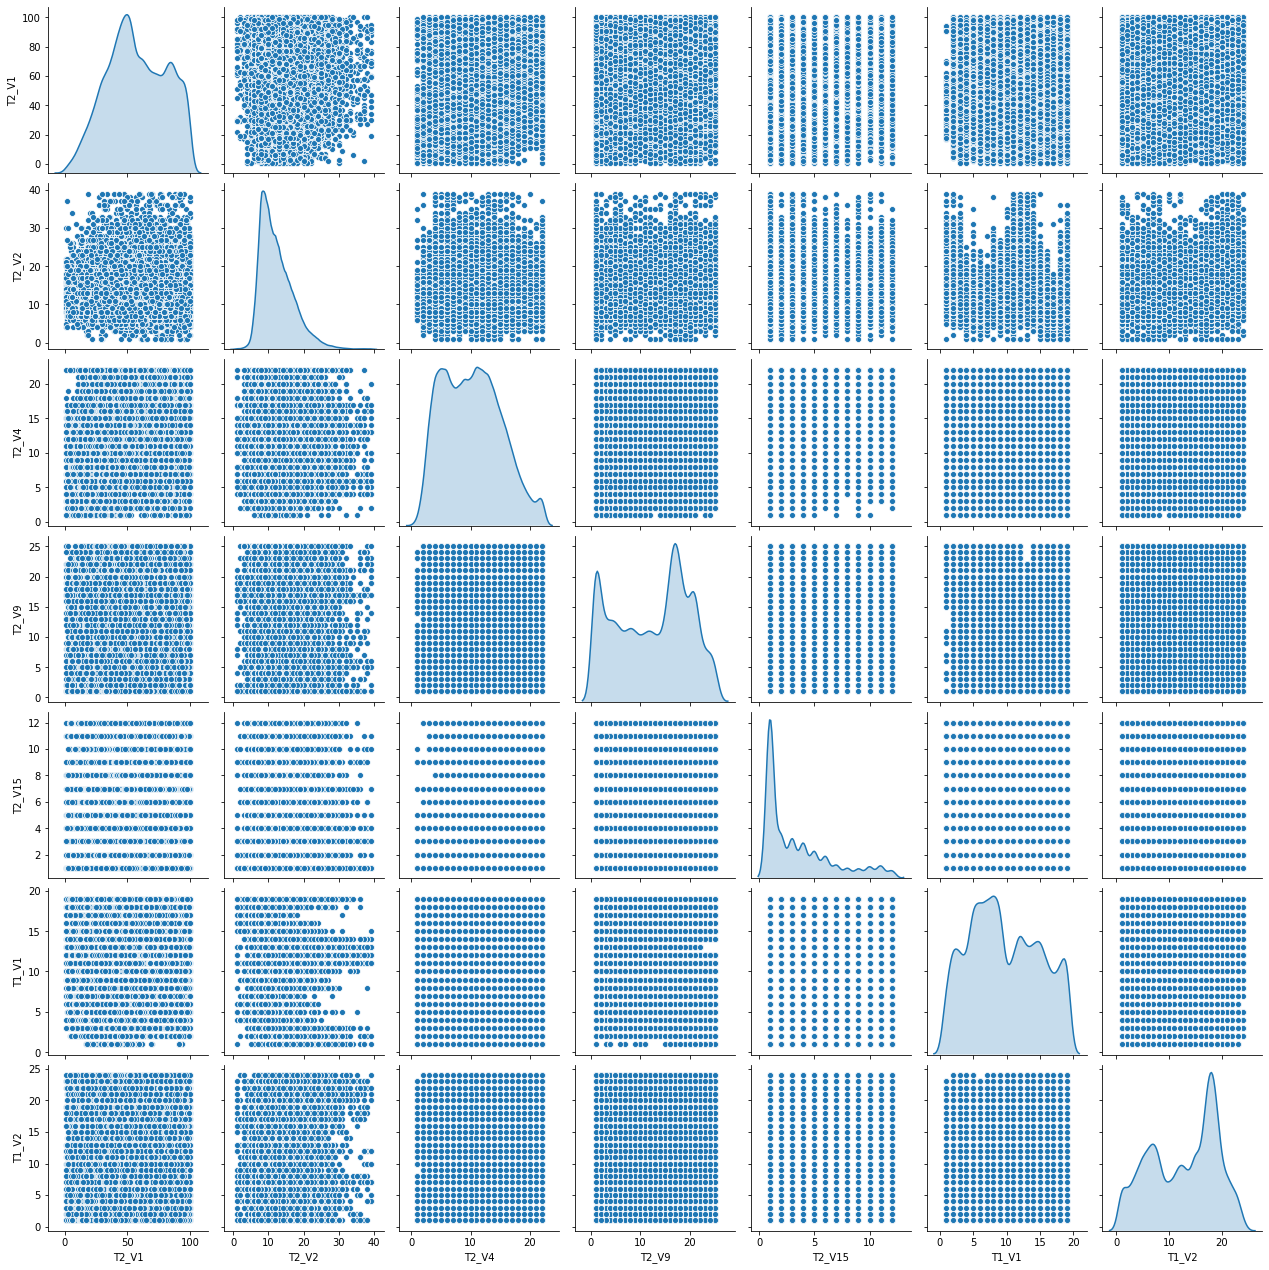

In [101]:
sns.pairplot(train_df[numerical_features],diag_kind='kde')
plt.show()

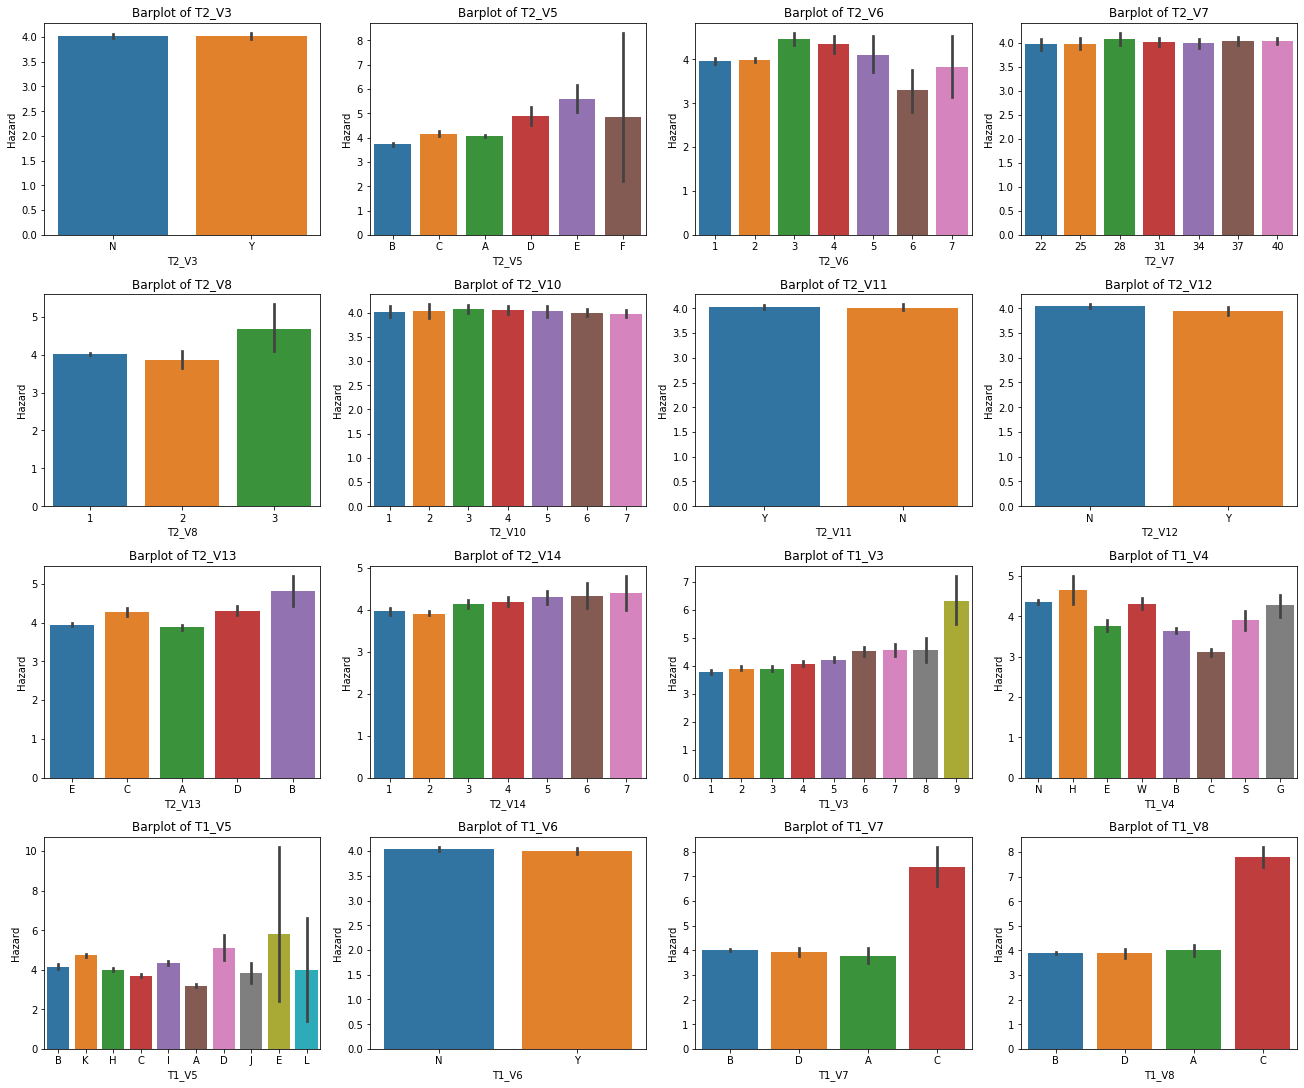

In [102]:
figs, axes = plt.subplots(4,4, figsize=(18,15), constrained_layout=True)
ax = axes.flat
for col,ax in zip(categorical_features, ax):
    sns.barplot(train_df[col], train_df.Hazard, ax=ax, orient='v')
    ax.set_title(f"Barplot of {col}")
plt.show()

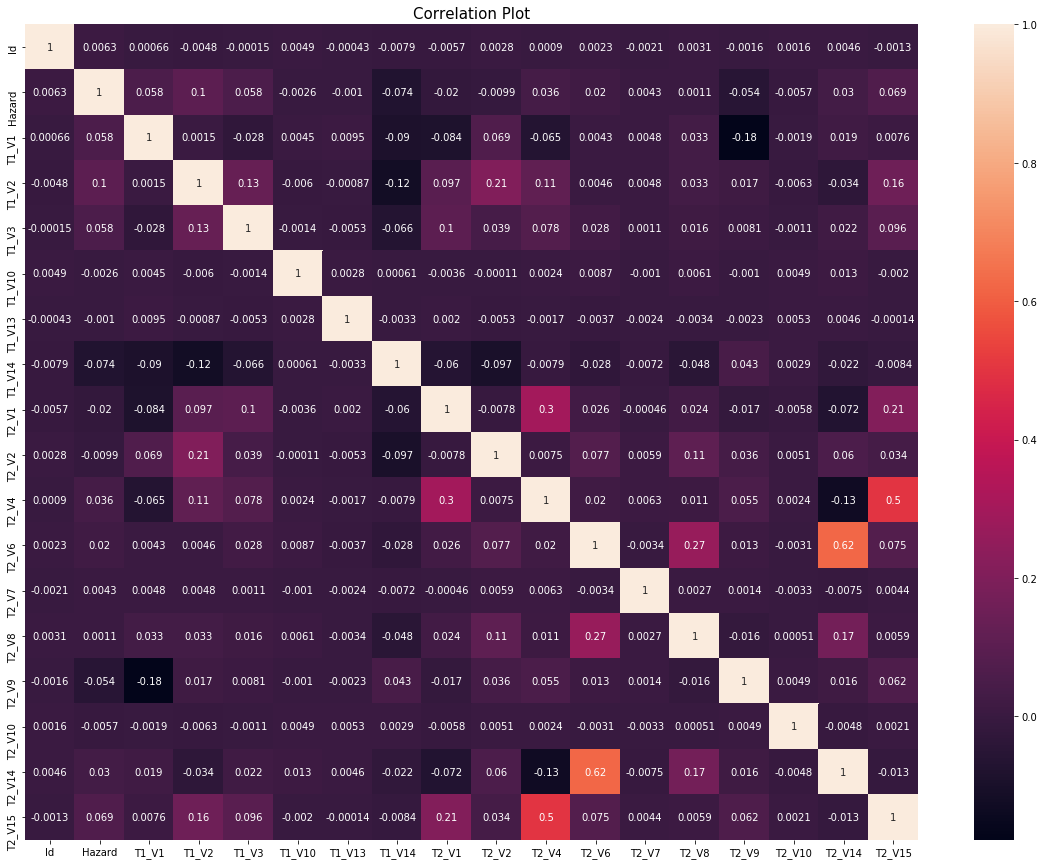

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(train_df.corr(),annot=True)
plt.title('Correlation Plot',fontdict={'fontsize':15})
plt.show()

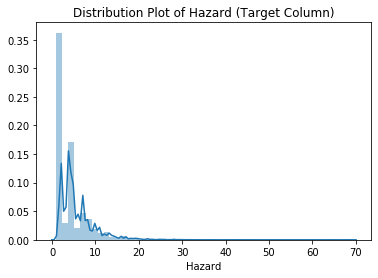

In [27]:
sns.distplot(train_df.Hazard)
plt.title('Distribution Plot of Hazard (Target Column)')
plt.show()

In [28]:
def transform_train(data):
    test_convert={}
    for i in data.drop(columns=['Id']).columns:
        if(data[i].nunique()==2):
            cat={data[i].value_counts().sort_values().index[0] : 0,data[i].value_counts().sort_values().index[1] :1}
            test_convert[i]=cat
            data[i]=data[i].map(cat)
        elif(i in categorical_features):
            group=data.groupby(i).Hazard.mean().sort_values(ascending=False)
            group=group/group.tolist()[-1]
            test_convert[i]=group
            data[i]=data[i].replace(group.index,group.values)
        else:
            data[i]=data[i]
    return data.drop(columns='Id'),test_convert

In [29]:
train_data,test_convert = transform_train(train_df)

In [30]:
train_data.head()

,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,15,3,1.030301,1.402577,1.301792,1,1.060362,1.005559,1.276194,...,1.208079,1.019152,1.040058,11,1.005652,1,1,1.017386,1.000000,2
1,4,16,14,1.113744,1.495874,1.301792,1,1.060362,1.005559,1.000000,...,1.208079,1.000000,1.040058,18,1.012476,1,0,1.017386,1.000000,1
2,1,10,10,1.113744,1.402577,1.478554,1,1.060362,1.005559,1.635451,...,1.000000,1.019152,1.000000,14,1.005652,1,0,1.017386,1.107265,1
3,1,18,18,1.113744,1.402577,1.478554,1,1.060362,1.005559,1.635451,...,1.208079,1.004748,1.040058,1,1.005652,1,1,1.101285,1.000000,6
4,1,13,19,1.113744,1.402577,1.249124,1,1.060362,1.005559,1.635451,...,1.202473,1.000000,1.040058,2,1.000000,0,1,1.017386,1.012828,1


In [35]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,6,2,13,4,C,A,Y,B,B,D,...,2,28,1,22,6,Y,N,E,2,7
1,7,10,10,7,N,C,Y,B,B,D,...,3,28,1,4,3,Y,N,E,5,8
2,8,9,20,4,N,H,Y,B,B,E,...,2,22,1,1,7,N,N,C,6,1
3,9,11,18,2,N,H,Y,B,B,D,...,4,40,1,20,6,Y,N,E,5,5
4,10,4,5,4,H,K,Y,B,B,E,...,2,34,1,11,7,Y,Y,E,2,1


In [34]:
def transform_test(df,test_convert):
    for i in df.drop(columns='Id'):
        if(df[i].nunique()==2):
            df[i]=df[i].map(test_convert[i])
        elif(str(i) in test_convert.keys()):
            df[i]=df.replace(test_convert[i].index,test_convert[i].values)
        else:
            df[i]=df[i]
    return df.drop(columns='Id')

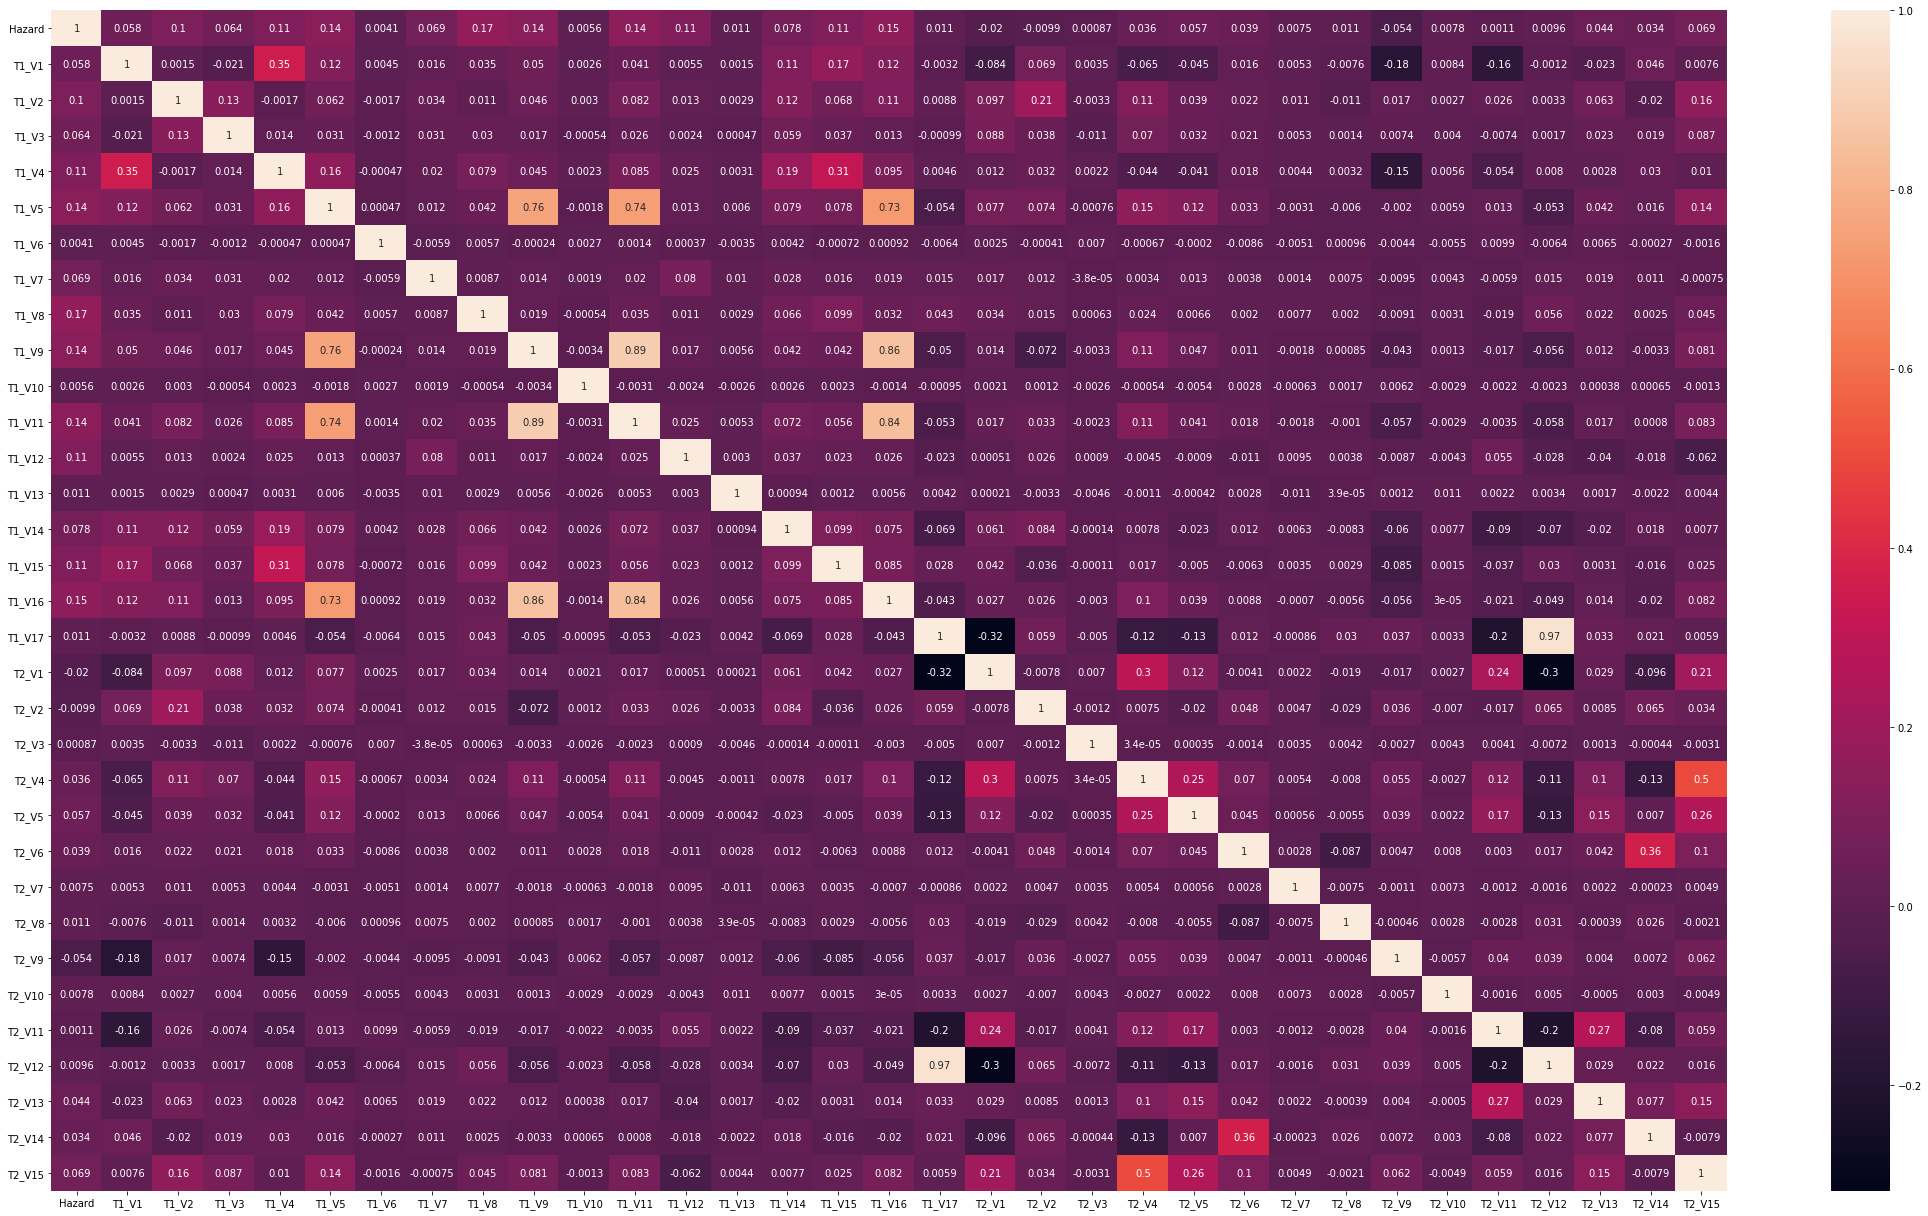

In [45]:
plt.figure(figsize=(30,17))
sns.heatmap(train_data.corr(),annot=True)
plt.tight_layout()
plt.show()

# Model Building

In [36]:
# User define function for our evaluatiom metric normalized gini

def gini(y_true,y_pred):
    array=np.array(np.c_[y_true,y_pred,np.arange(len(y_true))])
    array=np.array(sorted(array,key=lambda b: b[1]))
    total_loss=array[:,0].sum()
    gini_sum=array[:,0].cumsum().sum()/total_loss
    gini_sum-=(len(y_true)+1)/2
    return -gini_sum/len(y_true)


def gini_normalized(y_true, y_pred):
    return gini(y_true, y_pred) / gini(y_true, y_true)

In [48]:
X = train_data.drop('Hazard',axis=1)
y = train_data.Hazard

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [50]:
# user define scoring metric normalized gini

def gini_score(estimator,X,y):
    y_pred=estimator.predict(X)
    score=gini_normalized(y,y_pred)
    return score

In [61]:
# Keeping all models in one list

models=[]
models.append(('Linear Regression',LinearRegression()))
models.append(('Gradient Boost',GradientBoostingRegressor(random_state=42)))
models.append(('Random Forest',RandomForestRegressor(random_state=42)))
models.append(('Extra Tree',ExtraTreesRegressor(random_state=42)))

In [55]:
# Evaluating Each model

names=[]
predictions=[]
score = []
bias_error = []
var_error = []
for name,model in models:
    fold=KFold(shuffle=True,n_splits=5,random_state=42)
    if name == 'Gradient Boost' or name == 'Linear Regression':
        result=cross_val_score(model, X_scaled, y, cv=fold, scoring=gini_score)
    else:
        result=cross_val_score(model, X, y, cv=fold, scoring=gini_score)
    predictions.append(result)
    names.append(name)
    score.append(result.mean())
    bias_error.append(1-result.mean())
    var_error.append(np.std(result,ddof=1)**2)

In [60]:
acc_df = pd.DataFrame({'Gini Score':score,'Bias Error':np.round(bias_error,4),
                       'Variance Error':np.round(var_error,6)},index=names)

acc_df

,Gini Score,Bias Error,Variance Error
Linear Regression,0.331974,0.6680,0.000049
Gradient Boost,0.373323,0.6267,0.000054
Random Forest,0.338431,0.6616,0.000158
Extra Tree,0.333091,0.6669,0.000187


From the above table we can see that Gradient Boost is performing the best. So, further we perform hypertuning of its parameters. 

# Hyperparameter tuning of Gradient Boost

In [65]:
gb = GradientBoostingRegressor(random_state=42)
gb_param = {'n_estimators':sp_randint(50,500)}
fold = KFold(shuffle=True,n_splits=5,random_state=42)

**RandomizedSearchCV**

In [66]:
rs_gb = RandomizedSearchCV(gb, gb_param, cv=fold, scoring=gini_score, random_state=42)
rs_gb.fit(X_scaled,y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                

In [67]:
print('Gini Score:',rs_gb.best_score_)
print('Best Parameters:',rs_gb.best_params_)

Gini Score: 0.378376821375528
Best Parameters: {'n_estimators': 320}


**GridSearchCV**

In [72]:
gb = GradientBoostingRegressor(random_state=42)
gb_param = {'n_estimators':np.arange(200,500)}

In [74]:
gs_gb = GridSearchCV(gb,gb_param,cv=fold,scoring=gini_score,n_jobs=-1)
gs_gb.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weigh...
       434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446,
       447, 448, 449, 450, 451, 452, 453,

In [75]:
print('Gini Score:',gs_gb.best_score_)
print('Best Parameters:',gs_gb.best_params_)

Gini Score: 0.37860188090349406
Best Parameters: {'n_estimators': 332}


In [76]:
gb = GradientBoostingRegressor(n_estimators=332,random_state=42)
cv = cross_val_score(gb,X,y,scoring=gini_score,cv=fold)

In [77]:
print('Gini Score:',cv.mean())
print('Bais Error:',(1-cv.mean()))
print('Variance Error:',(np.std(cv,ddof=1)**2))

Gini Score: 0.37860188090349406
Bais Error: 0.6213981190965059
Variance Error: 0.00013735142856973994


So, finally we choose Gradient Boost with  n_estimators=332 as our final model.

In [78]:
test_df.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,6,2,13,4,C,A,Y,B,B,D,...,2,28,1,22,6,Y,N,E,2,7
1,7,10,10,7,N,C,Y,B,B,D,...,3,28,1,4,3,Y,N,E,5,8
2,8,9,20,4,N,H,Y,B,B,E,...,2,22,1,1,7,N,N,C,6,1
3,9,11,18,2,N,H,Y,B,B,D,...,4,40,1,20,6,Y,N,E,5,5
4,10,4,5,4,H,K,Y,B,B,E,...,2,34,1,11,7,Y,Y,E,2,1


In [79]:
test_data = transform_test(test_df,test_convert)

In [80]:
test_data.head()

,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,2,13,1.19468,6,6,0,6,6,6,6,...,1,6,6,22,1.00565,1,1,6.0,1.107265,7
1,10,10,1.20368,7,7,0,7,7,7,1.00389,...,1.15992,7,7,4,1,1,1,7.0,1.126617,8
2,9,20,1.20341,8,8,0,8,8,8,1.01006,...,8,8,8,1,8,0,1,8.0,8.000000,1
3,11,18,1.66976,9,9,0,9,9,9,9,...,9,9,9,20,9,1,1,9.0,9.000000,5
4,4,5,10,10,10,0,10,10,10,10,...,10,10,10,11,10,1,0,10.0,10.000000,1


In [103]:
test_data.shape

(51000, 32)

In [82]:
gs_gb.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=332,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
gb = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=332,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
gb.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=332,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
test_pred=gb.predict(test_data)

In [86]:
test_pred

array([25.53835657, 39.08341352, 36.61576263, ..., 36.1280628 ,
       39.83879251, 35.21794942])

In [87]:
x=pd.DataFrame({'Id':test_df.Id,'Hazard':test_pred},dtype='object')
x

,Id,Hazard
0,6,25.5384
1,7,39.0834
2,8,36.6158
3,9,33.4273
4,10,40.103
...,...,...
50995,101989,37.5712
50996,101990,43.0875
50997,101995,36.1281
50998,101996,39.8388


In [88]:
x.to_csv('Submission_File.csv',header=True,index=False)

Finally with a gini score of 0.3786 on train data using Gradient Boost (n_esttimators=332) we have predicted the values of test data.